<p style="font-size:32px;text-align:center"> <b>PREDICTING CUSTOMER CHURN</b> </p>

<img src = '1.jpg'>

## BUSINESS PROBLEM

Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one. For example, if Netflix knew a segment of customers who were at risk of churning they could proactively engage them with special offers instead of simply losing them.

## OBJECTIVE

- To develop a model for predicting customer churn at a fictitious wireless telecom company .
- Use insights from the model to develop an incentive plan for enticing would-be churners to remain with company.

## CONSTRAINTS

- The only constraint is interpretability of the model.
- How to further utilise it to take business decison to avoid the customer churn

# Importing importand libraries  data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


We will use pandas to import csv file and create the DataFrame frm it

In [2]:
data  = pd.read_csv('Churn.csv')#importing the data using pandas 

# Understanding the data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
print(data.columns)
print('******************************************************')
print('shape of the data is:')
data.shape

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
******************************************************
shape of the data is:


(7043, 21)

So we have 7043 data points and 21 columns out of which 1 column in our class to be predicted i.e. Churn

In [6]:
data.info()# to understand the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

we have 18 categorical features and 3 numeric features in the dataset

In [7]:
data.isnull().sum()#finding the number of missing values in data 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

There are no missing values in the dataset,it seems that the data has been preprocessed prior to it has been made availabe for modelling

# Data Manipulation

### EXPLORATORY DATA ANALYSIS

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:

- __Partner__: whether the customer has a partner or not (Yes, No),
- __Dependents__: whether the customer has dependents or not (Yes, No),
- __OnlineBackup__: whether the customer has online backup or not (Yes, No, No internet service),
- __tenure__: number of months the customer has stayed with the company,
- __MonthlyCharges__: the amount charged to the customer monthly,
- __TotalCharges__: the total amount charged to the customer.

In [9]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors="coerce")
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We need to convert TotalCharges column to float datatype

In [10]:
#separating class label and categorical and numerical features

#churn = data['Churn']#target variable
#data.drop('Churn',axis=1)

categorical_features = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",\
                        "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",\
                        "PaperlessBilling","PaymentMethod"]#categorical features

numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]#all the numerical features


In [11]:
data[numerical_features].describe()#for understanding how the numerical features in data are distributed

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000



- As we can see, the average time that a customer sticks with the telco is slightly more than 2 years.

- Average the Monthly Charges are \$64.8 & the Average Total Charges are \$2283.3.



As we can see that the tenure featre has random disreet values which will not help us much in interpreting the results,so 

In [12]:
def employee_tenure(data):
    if data['tenure'] <=12:
        return 'within_12'
    elif (data['tenure']>12) & (data['tenure']<=24):#encdoing for duration of months
        return '12_to_24'
    elif (data['tenure']>24) & (data['tenure']<=36):
        return '24_to_36'
    elif (data['tenure']>36) & (data['tenure']<=48):
        return '36_to_48'
    elif (data['tenure']>48) & (data['tenure']<=60):
        return '48_to_60'
    elif (data['tenure']>60) & (data['tenure']<=72):
        return '60_to_72'
    
data['tenure_groups'] = data.apply(lambda data:employee_tenure(data),axis=1)
categorical_features.append('tenure_groups')
    
data = data.drop(['customerID'],axis=1)

In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,within_12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24_to_36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,within_12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36_to_48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,within_12


# [3] Data Visualization

In [14]:
import itertools
from PIL import Image
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

## UNIVARIATE ANALYSIS

### Target Variable

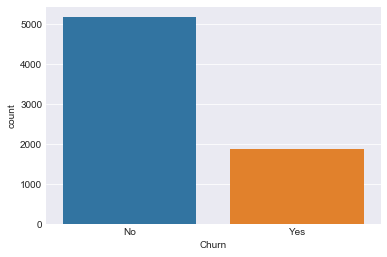

In [15]:
sns.set_style('darkgrid')
ax = sns.countplot(x="Churn", data=data)

- Churn: No 73.46%
- Churn: Yes 26.547%

### 1. NUMERICAL FEATURES
There are only three numerical columns: tenure, monthly charges and total charges. The probability density distribution can be estimate using the seaborn kdeplot function.

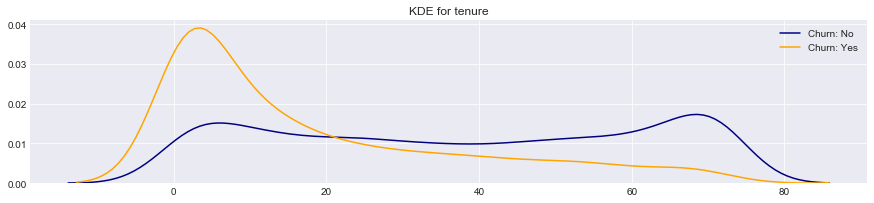

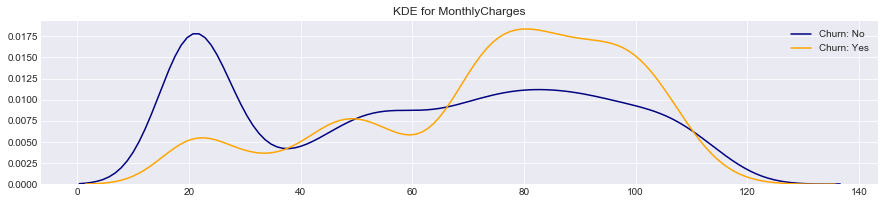

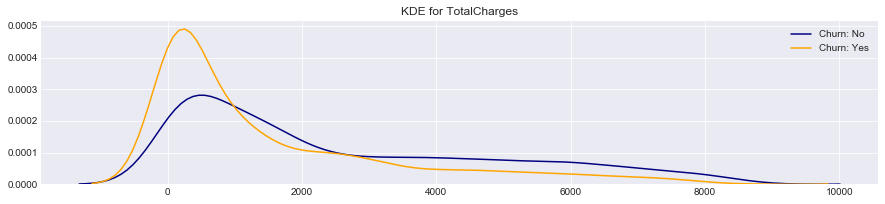

In [16]:
def kdeplot(feature):
    plt.figure(figsize=(15,3))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

- Recent clients are more likely to churn
- Clients with higher MonthlyCharges are also more likely to churn
- Tenure and MonthlyCharges are probably important features

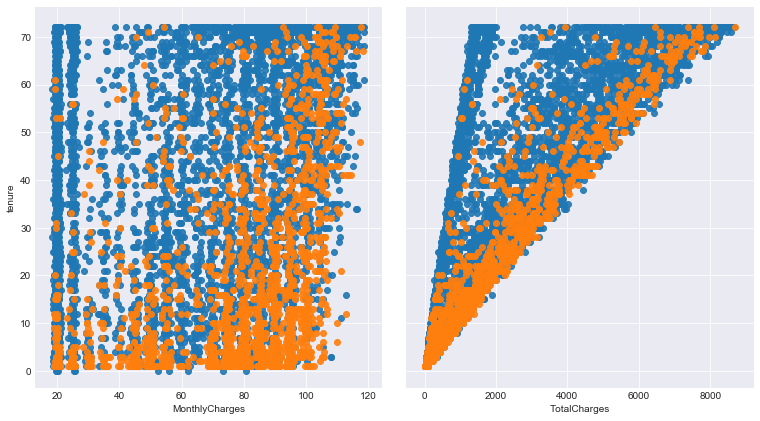

In [17]:
g = sns.PairGrid(data, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"],size = 6, hue="Churn", aspect=0.9)
#plt.figure(figsize=(15,10))
ax = g.map(plt.scatter, alpha=0.9)

Another feature we can consider is the difference between the MonthlyCharges and the TotalCharges divided by the tenure:

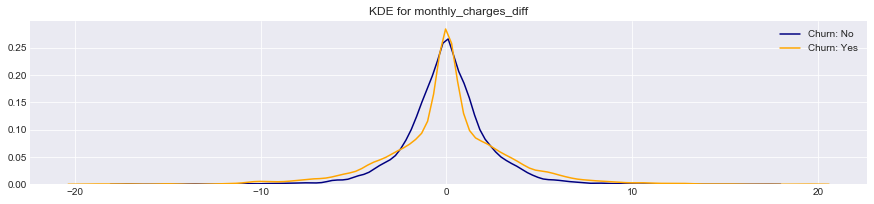

In [18]:
data['total_charges_to_tenure_ratio'] = data['TotalCharges'] / data['tenure']
data['monthly_charges_diff'] = data['MonthlyCharges'] - data['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')


Not a promising feature at first glance, but it might be usefull when combined with categorical features.

### 2.Categorical Features
This dataset has 16 categorical features:

- Six binary features (Yes/No)
- Nine features with three unique values each (categories)
- One feature with four unique values

### 2.1 Gender and Age

In [19]:
data.groupby('SeniorCitizen')['Churn'].value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

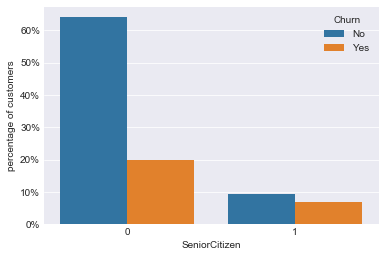

In [20]:
def barplot_percentages(feature, orient='v', axis_name = "percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

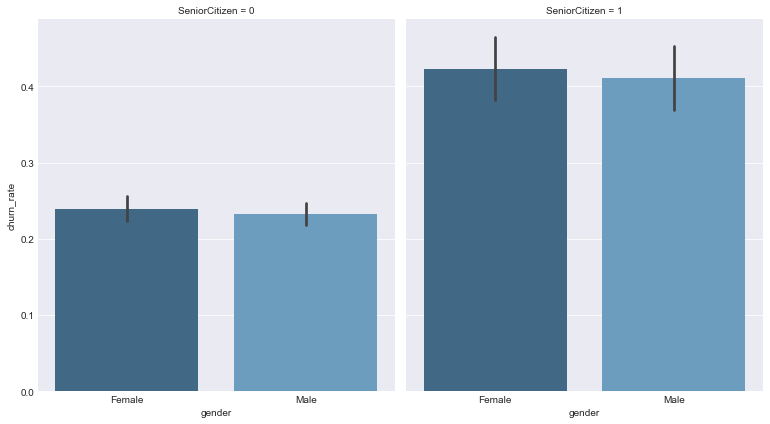

In [21]:
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(data, col="SeniorCitizen", size=6, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])


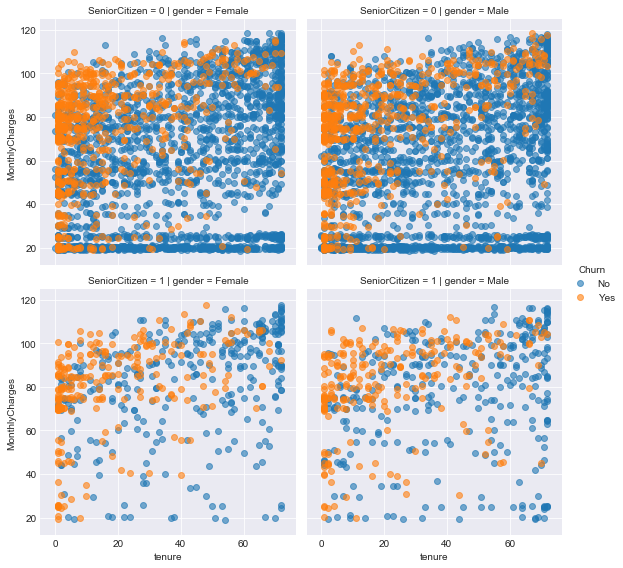

In [22]:
g = sns.FacetGrid(data, row='SeniorCitizen', col="gender", hue="Churn", size=4)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

- Gender is not an indicative of churn.
- SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
- There are no special relations between this categorical values and the main numerical features.

### 2.2 Partner and Dependents

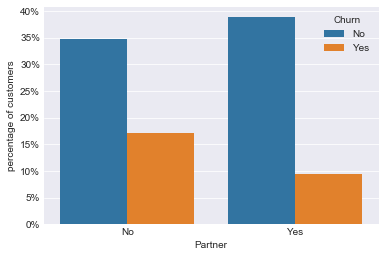

In [23]:
barplot_percentages("Partner")

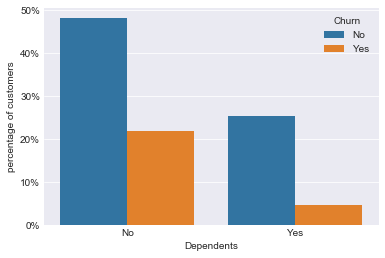

In [24]:
barplot_percentages("Dependents")

- Customers that doesn't have partners are more likely to churn
- Customers without dependents are also more likely to churn

### 2.3 Phone and Internet Services

Now let's look at the services that customers are using. There are only two main services: phone and internet but the former has many additionals like online backup and security.

here are only two features here: if the client has phone and if he has more than one line. Both can be summed up in one chart:

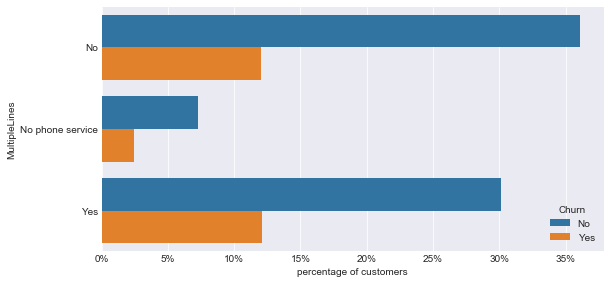

In [25]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

- Few customers doesn't have phone service
- Customers with multiple lines are more likely to churn

Let's see how multiple lines affects the monthly charges:

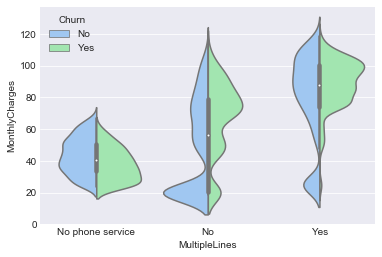

In [26]:
ax = sns.violinplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=data, height=6, aspect=1.4)

#### Internet Services

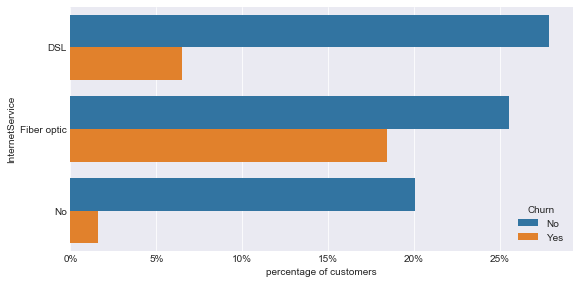

In [27]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

- Clients without internet have a very low churn rate
- Customers with fiber are more probable to churn than those with DSL connection

Comparing the Internet service with monthly charges:

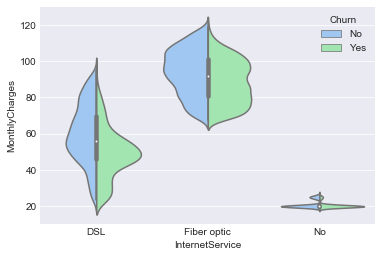

In [28]:
ax = sns.violinplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=data, height=5, aspect=1.4);

- It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn

### 2.4 Additional Services

There are six additional services for customers with internet:

In [29]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
df1.head(10)

,variable,Has service
0,OnlineSecurity,No
1,OnlineSecurity,Yes
2,OnlineSecurity,Yes
3,OnlineSecurity,Yes
4,OnlineSecurity,No
5,OnlineSecurity,No
6,OnlineSecurity,No
7,OnlineSecurity,Yes
8,OnlineSecurity,No
9,OnlineSecurity,Yes


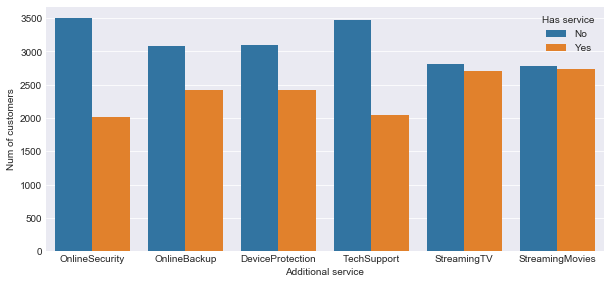

In [30]:
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

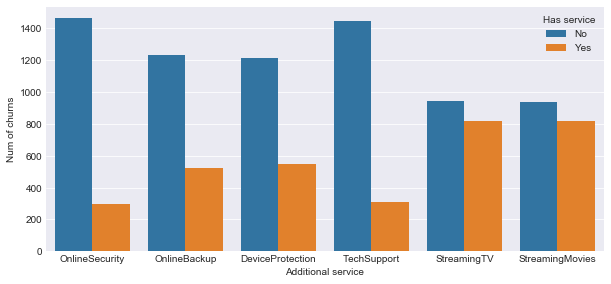

In [31]:
plt.figure(figsize=(10, 4.5))
df1 = data[(data.InternetService != "No") & (data.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()


The first plot shows the total number of customers for each additional service, while the second shows the number of clients that churn. We can see that:

- Customers with the first 4 additionals (security to tech support) are more unlikely to churn
- Streaming service is not predictive for churn

### 2.5 Contract and Payment

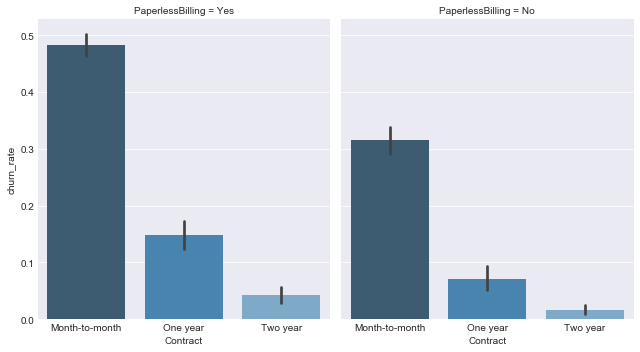

In [32]:
g = sns.FacetGrid(data, col="PaperlessBilling", size=5, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

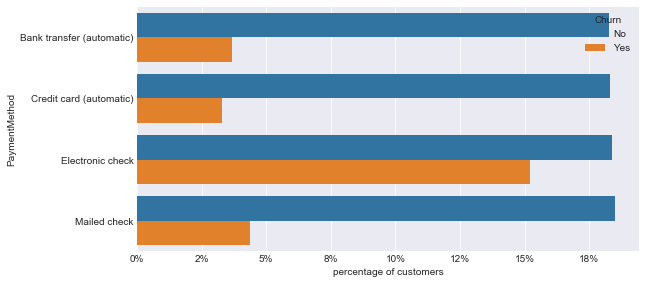

In [33]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few observations:

- Customers with paper billing are more probable to churn
- The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
- Short term contracts have higher churn rates

One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour. Now let's have a look at the relation with numerical features:

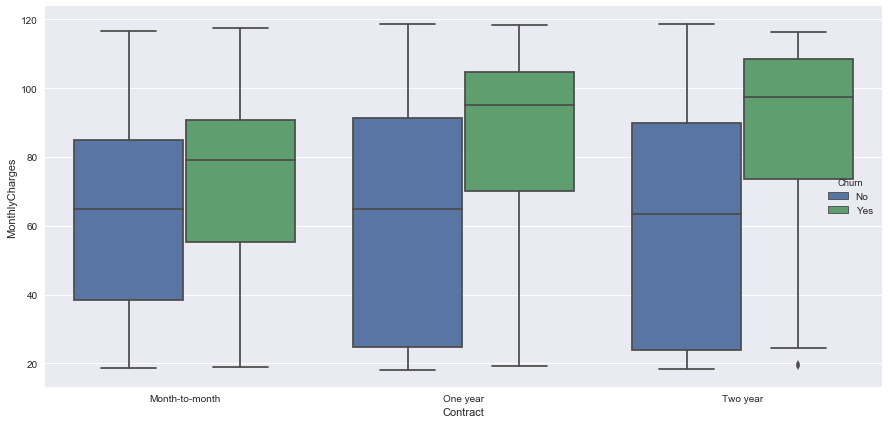

In [34]:
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=data)

- Longer contracts are more affected by higher monthly charges (for churn rate).
- Mailed checks have lower charges
- There is a huge gap between customers that churn and those that dont with respect to Mailed Check

## [3.2] Label Encoding the variables

In [35]:
#transforming the data
from sklearn.preprocessing import LabelEncoder
data = data.apply(LabelEncoder().fit_transform)
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_groups,total_charges_to_tenure_ratio,monthly_charges_diff,churn_rate
0,0,0,1,0,1,0,1,0,0,2,...,0,1,2,142,74,0,5,1447,3065,0
1,1,0,0,0,34,1,0,0,2,0,...,1,0,3,498,3624,0,1,2368,4665,0
2,1,0,0,0,2,1,0,0,2,2,...,0,1,3,436,536,1,5,2260,2781,1


where 'Churn' == 0 means No and 'Churn' == 1 mean Yes

After encoding the variables we need to analyze the correlation between the variable,so we plot the correlation matrix

## [3.3] Correlation Matrix

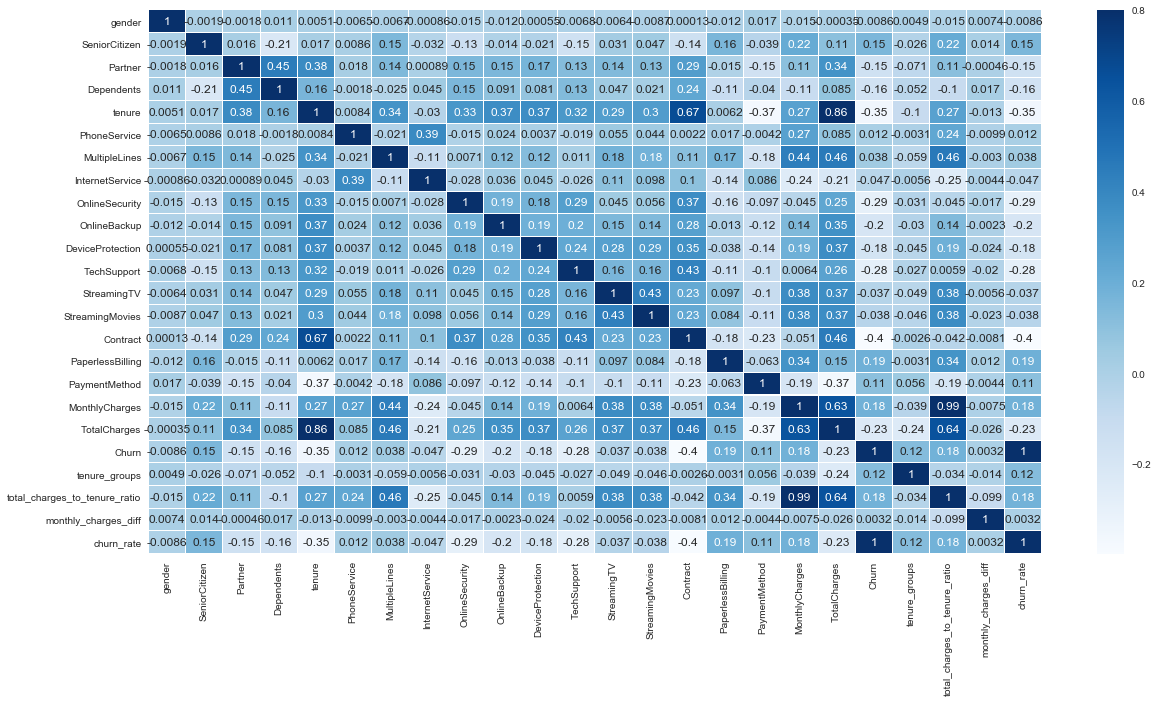

In [36]:
# Correlation Plot
matrix = data.corr()
#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))
#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(matrix, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

Variables: __TotalCharges__, __MonthlyCharges__ & __Tenure__ are the variables which seem highly correlated which seems obvious. __TotalCharges__ is nothing but MonthlyCharges times __Tenure__. To avoid multicollinearity, we get rid of the TotalCharges feature in our analysis.

In [37]:
data = data.drop('TotalCharges',axis=1)

## [3.5 ] Advanced Data Visualization and Feature Selection

We will implement T-SNE for advanced data visualization and to see how data is distributed and we will also implement Principal Component Analysis for feature selecttion and understanding variance in the daa

In [43]:
labels = data['Churn']
cols = ['Churn','tenure']
data = data.drop(cols,axis=1)#dropping the columns

### Standardizing the data

In [44]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)#fittting the data
print(standardized_data.shape)#shape of standardized data

(7043, 20)


### PRINCIPAL COMPONENT ANALYSIS 

In [167]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



shape of pca_reduced.shape =  (7043, 2)


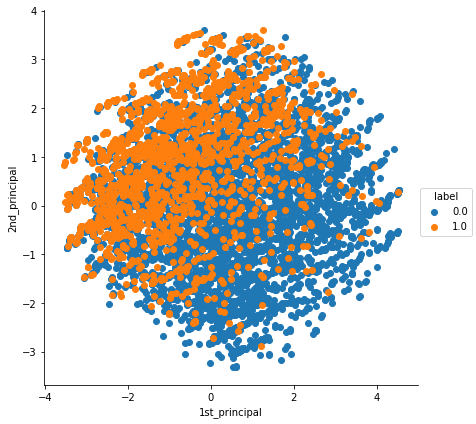

In [168]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

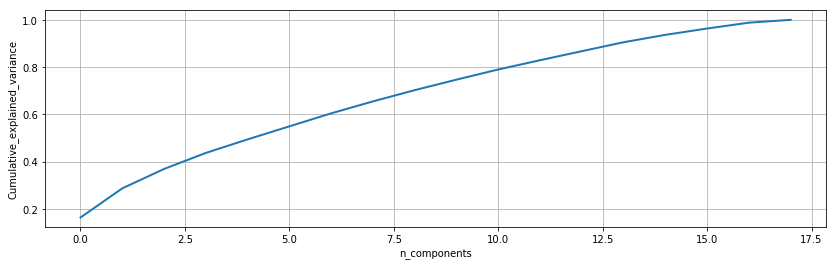

In [175]:
# PCA for dimensionality redcution 
pca.n_components = 18
pca_data = pca.fit_transform(standardized_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(14, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

which shows we are able to explain 80% variance in data with 10 features only,but as features are less so dropping any one of them might prove costly to us as it may hamper the interpretability of the model ,so we must fit all the features in our model for better understanding 

### T-SNE using Scikit learn

In [172]:
from sklearn.manifold import TSNE
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(standardized_data)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 7043
[t-SNE] Computed conditional probabilities for sample 2000 / 7043
[t-SNE] Computed conditional probabilities for sample 3000 / 7043
[t-SNE] Computed conditional probabilities for sample 4000 / 7043
[t-SNE] Computed conditional probabilities for sample 5000 / 7043
[t-SNE] Computed conditional probabilities for sample 6000 / 7043
[t-SNE] Computed conditional probabilities for sample 7000 / 7043
[t-SNE] Computed conditional probabilities for sample 7043 / 7043
[t-SNE] Mean sigma: 0.087599
[t-SNE] Iteration 25: error = 1.7987947, gradient norm = 0.0062273
[t-SNE] Iteration 50: error = 1.7761875, gradient norm = 0.0079367
[t-SNE] Iteration 75: error = 1.6314279, gradient norm = 0.0025842
[t-SNE] Iteration 100: error = 1.5931680, gradient norm = 0.0022373
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.593168
[t-SNE] Iterati

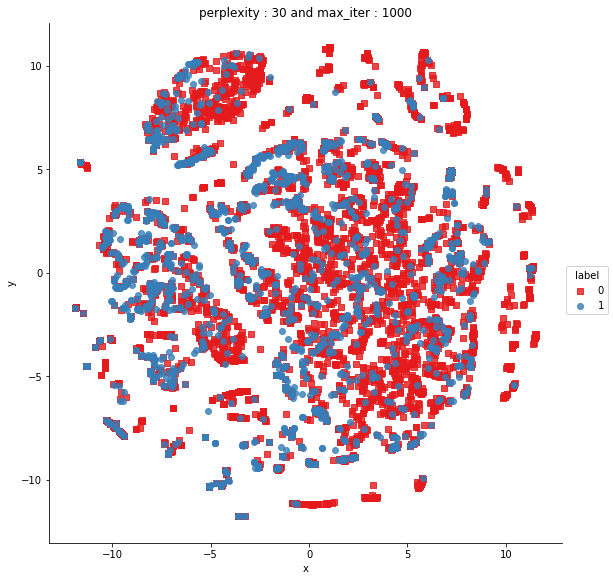

In [174]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':labels})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

this visualization shows how data points are embedded in two dimensional spaces

# Implement Machine Learning Models

After cleanining,manipulating and visualizing the data,now its time to build models.Let's get started

We are implementing 3 models.Models used are -

- Logistic Regression
- Random Forest
- Linear SVM

Our target variable is a binary variable. The customer either stays or leaves. Hence, we decided to use the Logistic Regression as our first model to check how the data fits the model. The models have been selected in no specific order.

## Splitting the data

we wiil split the data into 7:3 ratio,i.e 70% of the data will be used for training the model and 30% data for testing the model

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size = 0.3,random_state = 42)
print('trainig dataset after splitting is',X_train.shape)
print('Test datset after spliting is',X_test.shape)

trainig dataset after splitting is (4930, 20)
Test datset after spliting is (2113, 20)


In [46]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,tenure_groups,total_charges_to_tenure_ratio,monthly_charges_diff
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,142,5,1447,3065
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,498,1,2368,4665
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,436,5,2260,2781
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,266,2,1675,4677
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,729,5,3618,198


## Model 1: LOGISTIC REGRESSION

### L2 Regularization and Grid Search Cross validation

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# we will tune the hyperparameter lambda for avoiding overfittting and underfitting of data
# we will use stratified Kfold for cross validation of data

param = {'C': [10**i for i in range(-4,5)]}
skf= StratifiedKFold(n_splits=5)#number of splits are set to 5
model_lr = GridSearchCV(LogisticRegression(penalty='l2'),param_grid = param,cv = skf,scoring = 'roc_auc',n_jobs=-1,verbose=1)
#using GridSearchCv
model_lr.fit(X_train,Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    3.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

### Plottting Hyperparameter vs metric for tuning

************************
Best Hyperparameter value we get after tuning the model is : {'C': 100}


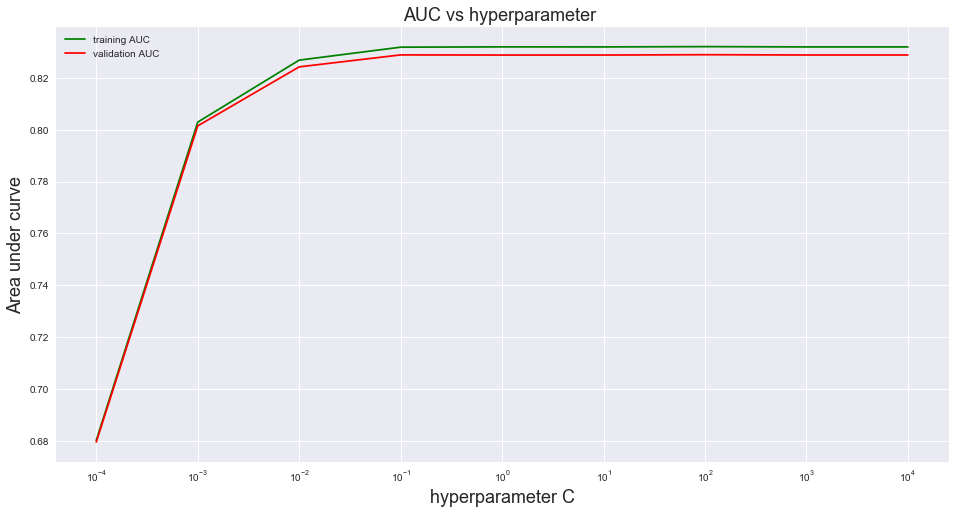

In [48]:
t_auc = model_lr.cv_results_['mean_train_score']#mean training score computed for every fold
cv_auc = model_lr.cv_results_['mean_test_score']#mean cross validation score computed for every fold
val = [10**i for i in range(-4,5)]
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.plot(val,t_auc,'g',label = 'training AUC')#t_auc refers to the auc on training data
plt.plot(val,cv_auc,'r',label='validation AUC')# c_auc refers to the auc on cross validation data
#plotting the graph between AUC and hyperparameter for tuning 
plt.xscale('log')#taking log scale for x axis for better analysing the results
plt.xlabel('hyperparameter C',fontsize=18)
plt.ylabel('Area under curve',fontsize=18)
    #plt.xticks([])
    #plt.yticks([])
plt.legend(loc = 'best')
plt.title('AUC vs hyperparameter ',fontsize=18)

#******************************
print("************************")
best_C_lr = model_lr.best_params_
print('Best Hyperparameter value we get after tuning the model is :',best_C_lr)

### Feature Importances 

- Feature Importances will tell us about most important features in helping for model interpretability

In [49]:
clf_optimal = LogisticRegression(C =best_C_lr['C'],penalty='l2',verbose=1)#fitting the best hyperparameter found by tuning the model
clf_optimal.fit(X_train,Y_train)
#print(clf_optimal.coef_)
w = clf_optimal.coef_[0]#finding the coefficients of all features
print(clf_optimal.classes_)
print(w)


[LibLinear][0 1]
[ -1.62170213e-01   1.77199661e-01  -1.82805266e-01  -1.71684779e-01
  -4.68064476e-01  -2.51287723e-03   1.79651379e-02  -3.63548461e-01
  -2.27940605e-01  -8.69597388e-02  -2.63144957e-01  -2.61707229e-02
   7.47762120e-02  -1.19702018e+00   2.37645249e-01   6.69122849e-02
   3.34727593e-03   1.52094078e-01  -5.64429051e-04  -9.47778849e-05]


where class 0 denotes that customer did not churn while class 1 denotes that they churned out

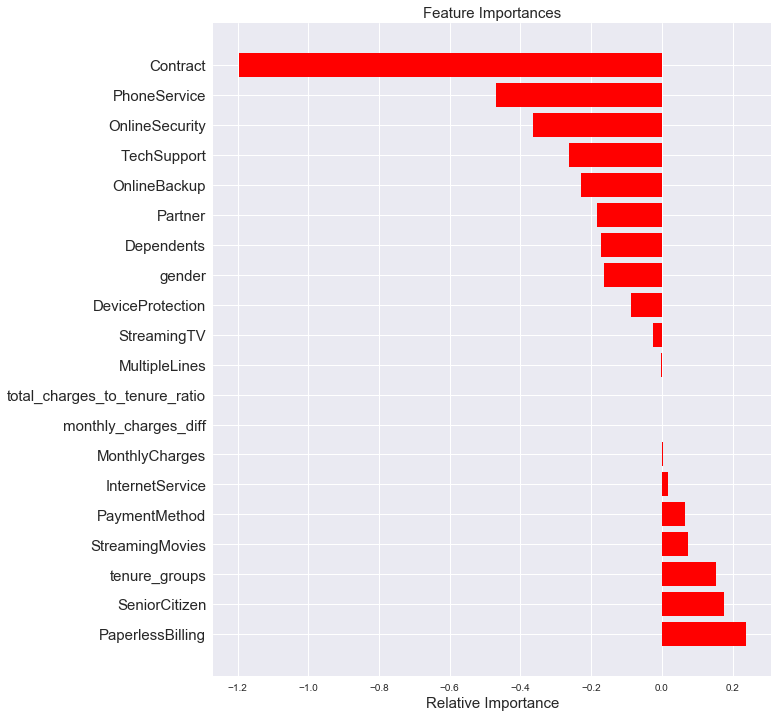

In [50]:
features = data.columns
#features = vect.get_feature_names()#getting name of the features after fitting and transforming by countvectorizer
#negative_indices = np.argsort(w)
indices = np.argsort(w)[::-1]
pos_dict = {}
neg_dict = {}
    


#print('TOP 20 important features for positive class and their coefficients in this featurization are:\n')
for i in (indices):
    pos_dict[features[i]] = w[i]
pos_df = pd.DataFrame.from_dict(pos_dict,orient = 'index',columns=['Coefficients'])
#print(pos_df)
#print("************************************************")


plt.figure(figsize=(10,12))
plt.title('Feature Importances',fontsize=15)
plt.barh(range(len(indices)), pos_df['Coefficients'], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices],fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.show()

from the above graph we can infer a lot of things regarding interpretability from the model
- __PaperlessBilling__ , __tenure_groups__ , __Internet_Service__ , __SeniorCitizen__ , __PaymentMethod__ were the features will actually favoured the model towards positive class i.e these features impacted most in a cutomer's churning out

## MODEL 2: Random Forest Classifier

### Grid Search Cross Validation for tuning both the hyperparameters

In [51]:
from sklearn.ensemble import RandomForestClassifier


estimators = [10,50,100,250,450]#list of estimators that will be tuned
depths = [3,9,11,15,50]#tuning depth to avoid overfitting and underfitting

params = {'max_depth':depths,'n_estimators':estimators}#for passing as argument
skf= StratifiedKFold(n_splits=5)#number of splits are set to 5
model_rf = GridSearchCV(RandomForestClassifier(bootstrap = True,criterion = 'gini',max_features = 'auto'),param_grid = params,cv = skf,\
                        scoring = 'roc_auc',n_jobs=-1,verbose=1)
model_rf.fit(X_train,Y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   40.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 9, 11, 15, 50], 'n_estimators': [10, 50, 100, 250, 450]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

Best Hyperparameters are: {'max_depth': 9, 'n_estimators': 450}


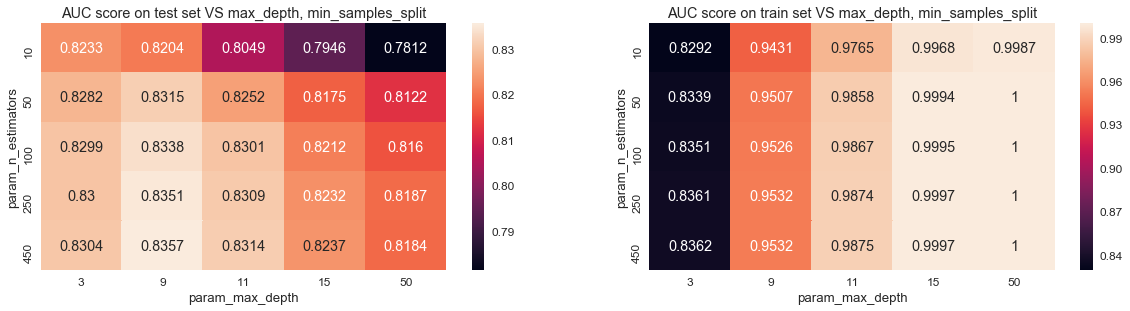

In [52]:
# as we have two hyperaparameters to tune so we will plot heatmap and to show hyperparameters giving maximum AUC score
print('Best Hyperparameters are:',model_rf.best_params_)
max_depth = model_rf.best_params_['max_depth']
n_estimators = model_rf.best_params_['n_estimators']
df = pd.DataFrame(model_rf.cv_results_)#saving into the dataframe
results = df.groupby(['param_n_estimators','param_max_depth']).min().unstack()[['mean_test_score',
                                                                                              'mean_train_score']]
#groupby by number of estimators and maximum depth and unstacking mean train and test score 
    
#results = results.fillna(0.1)#imputing all null values by 0.1
    
sns.set(font_scale = 1.2)
fig, ax = plt.subplots(figsize=(20,10))#setting the font size
plt.subplot(2,2,1)
title_test = 'AUC score on test set VS max_depth, min_samples_split'
fmt = 'png'
sns.heatmap(results.mean_test_score, annot=True, fmt='.4g');#heatmap for test score
plt.title(title_test);
#plt.savefig('{title_test}.{fmt}', format=fmt, dpi=300);
plt.subplot(2,2,2)
title_train = 'AUC score on train set VS max_depth, min_samples_split'
fmt = 'png'
sns.heatmap(results.mean_train_score, annot=True, fmt='.4g');#heatmap for train score
plt.title(title_train);
#plt.savefig('{title_train}.{fmt}', format=fmt, dpi=300);

## Feature Importances

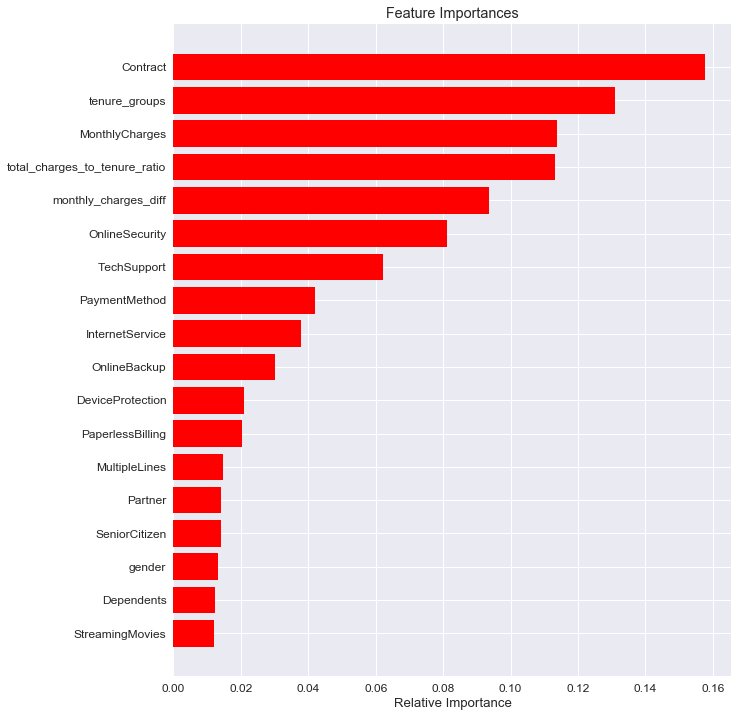

In [53]:
optimal_clf = RandomForestClassifier(max_depth = max_depth,n_estimators = n_estimators,bootstrap = True,criterion = 'gini',max_features='auto')
optimal_clf.fit(X_train,Y_train)

features = data.columns
importances = optimal_clf.feature_importances_
indices = (np.argsort(importances))[-18:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model 3: Linear SVM 

### SGD with hinge loss and gridsearch cv

In [68]:
from sklearn.linear_model import SGDClassifier
alpha = [10**i for i in range(-4,5,1)]
#tscv = TimeSeriesSplit(n_splits =  5)# for times series cross validation
params = {'alpha':alpha}

clf = SGDClassifier(penalty = 'l2',loss = 'hinge',random_state = 42)
#we will be checking for both l1 and l2 regularizations
svm = GridSearchCV(clf,param_grid = params,verbose = 1,cv = skf,scoring = 'roc_auc',return_train_score = True)
#cv = tscv does cross validation according to time series split
svm.fit(X_train,Y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.3s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

### Plotting Hyperparameter vs AUC for tuning

************************
Best Hyperparameter value we get after tuning the model is : {'alpha': 100}


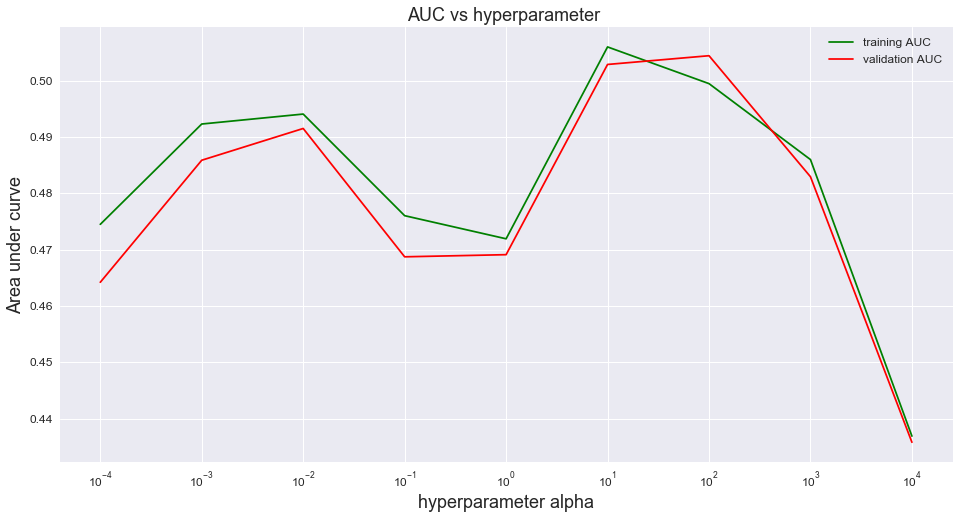

In [69]:
t_auc = svm.cv_results_['mean_train_score']#mean training score computed for every fold
cv_auc = svm.cv_results_['mean_test_score']#mean cross validation score computed for every fold
#val = [10**i for i in range(-4,5)]
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.plot(alpha,t_auc,'g',label = 'training AUC')#t_auc refers to the auc on training data
plt.plot(alpha,cv_auc,'r',label='validation AUC')# c_auc refers to the auc on cross validation data
#plotting the graph between AUC and hyperparameter for tuning 
plt.xscale('log')#taking log scale for x axis for better analysing the results
plt.xlabel('hyperparameter alpha',fontsize=18)
plt.ylabel('Area under curve',fontsize=18)
    #plt.xticks([])
    #plt.yticks([])
plt.legend(loc = 'best')
plt.title('AUC vs hyperparameter ',fontsize=18)

#******************************
print("************************")
best_alpha_svm = svm.best_params_
print('Best Hyperparameter value we get after tuning the model is :',best_alpha_svm)

### Feature Importances

In [70]:
optimal_clf = SGDClassifier(alpha = best_alpha_svm['alpha'],penalty = 'l2',loss = 'hinge',random_state = 42)
#clf_optimal = LogisticRegression(C =best_C_lr['C'],penalty='l2',verbose=1)#fitting the best hyperparameter found by tuning the model
optimal_clf.fit(X_train,Y_train)
#print(clf_optimal.coef_)
w = optimal_clf.coef_[0]#finding the coefficients of all features
print(optimal_clf.classes_)
print(w)


[0 1]
[ -8.51960447e-05   1.86214212e-04  -4.20706183e-04  -3.22933579e-04
  -1.43616190e-04  -2.34897666e-04  -1.14000422e-04  -1.20937814e-03
  -9.24579933e-04  -8.45063624e-04  -1.16880859e-03  -4.41802346e-04
  -4.61275728e-04  -1.49214787e-03   2.55182439e-04   3.97987237e-04
   1.29915854e-02   9.02672378e-04  -3.99812867e-03  -5.29026868e-04]


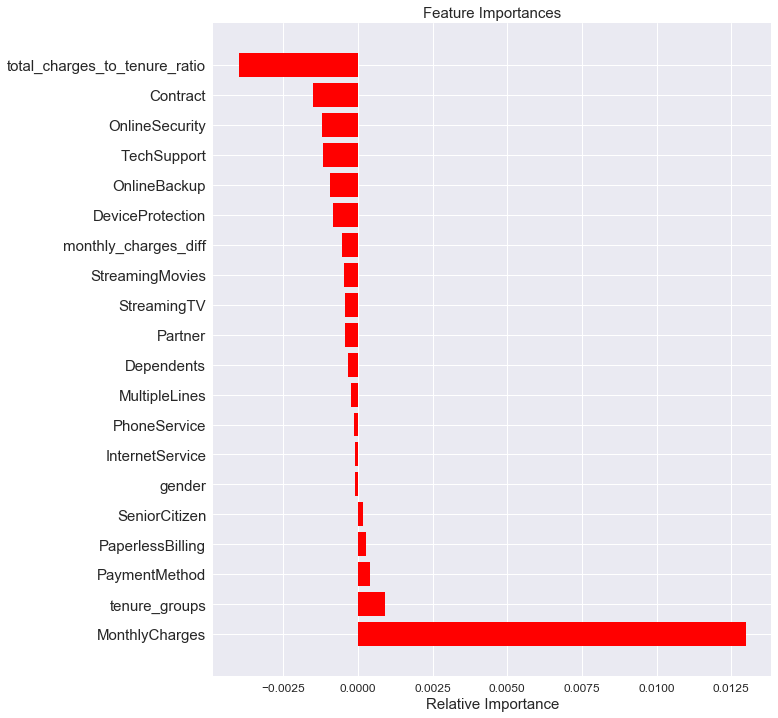

In [71]:
features = data.columns
#features = vect.get_feature_names()#getting name of the features after fitting and transforming by countvectorizer
#negative_indices = np.argsort(w)
indices = np.argsort(w)[::-1]
pos_dict = {}
neg_dict = {}
    


#print('TOP 20 important features for positive class and their coefficients in this featurization are:\n')
for i in (indices):
    pos_dict[features[i]] = w[i]
pos_df = pd.DataFrame.from_dict(pos_dict,orient = 'index',columns=['Coefficients'])
#print(pos_df)
#print("************************************************")


plt.figure(figsize=(10,12))
plt.title('Feature Importances',fontsize=15)
plt.barh(range(len(indices)), pos_df['Coefficients'], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices],fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.show()

# Model Evaluation

For our analysis, recall will be our target metric. We care the most about capturing as many true positives (people who are likely to churn) with our model, and we’re less concerned that we may sweep in some false negatives (people who did not churn) along with them.

We will plot ROC CURVE and Confusion Matrix for each of the classifiers

In [58]:
# fucntion for computing and plotting the ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


def plot_roc(train_proba,test_proba,auc_train,auc_test,t):
    print('plotting ROC on Test data')
    fpr_tr, tpr_tr, _ = roc_curve(Y_train,train_proba)
    fpr_test, tpr_test, _ = roc_curve(Y_test,test_proba)
    #calculating the fpr,tpr and thresholds for each training and test dataset
    sns.set_style('darkgrid')
    plt.figure(figsize=(15,8))
    plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),"g--")#this plots the roc curve for AUC = 0.5
    plt.plot(fpr_tr,tpr_tr,'r',linewidth=2,label="train auc="+str(auc_train))
    plt.plot(fpr_test,tpr_test,'b',linewidth=1,label=" test auc="+str(auc_test))
    plt.xlabel('False positive rate(1-specificity)',fontsize=18)
    plt.ylabel('True positive rate(sensitivity)',fontsize=18)
    plt.title('Reciever operating characteristics curve for '+t,fontsize=18)
    plt.legend(loc='best')
    plt.show()
    
# function for confusion matrix,precision,and recall
def plot_confusion_matrix(pred_y):
    print('Confusion Matrix')
    C = confusion_matrix(Y_test, pred_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)#for recall matrix
    
    B =(C/C.sum(axis=0))#for precision matrix
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    

AUC on test dataset is: 0.839037521536
plotting ROC on Test data


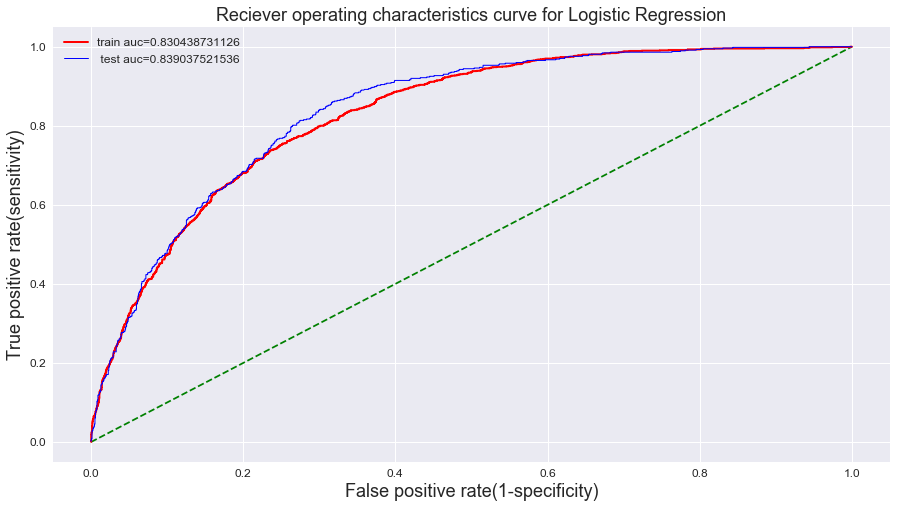

*************************************************************************
Matrix on test data
Confusion Matrix


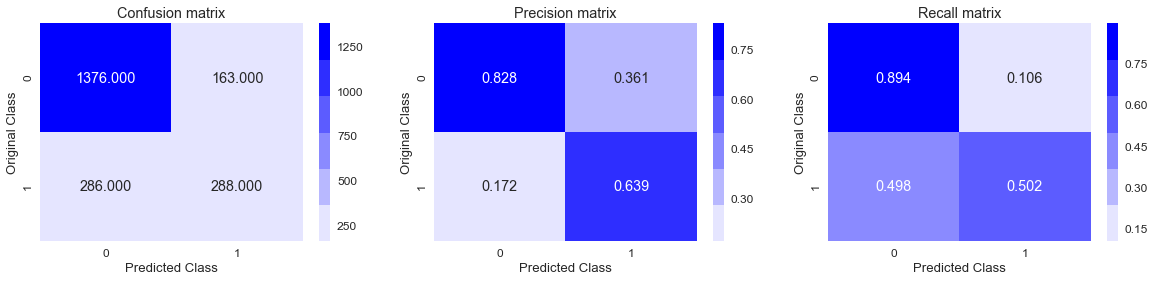

In [80]:
#FOR LOGISTIC REGRESSION
best_lr = LogisticRegression(C= best_C_lr['C'],penalty='l2')
best_lr.fit(X_train,Y_train)
lr_train_proba = best_lr.predict_proba(X_train)[:,1] 
lr_test_proba = best_lr.predict_proba(X_test)[:,1] 
lr_train_auc = roc_auc_score(Y_train,lr_train_proba)
lr_test_auc = roc_auc_score(Y_test,lr_test_proba)
lr_test_pred = best_lr.predict(X_test)
#printing all the metric scores
lr_recall_score = recall_score(Y_test,lr_test_pred)
lr_precision_score = precision_score(Y_test,lr_test_pred)
lr_f1_Score = f1_score(Y_test,lr_test_pred)

print('AUC on test dataset is:',lr_test_auc)
plot_roc(lr_train_proba,lr_test_proba,lr_train_auc,lr_test_auc,'Logistic Regression')
print('*************************************************************************')
print('Matrix on test data')
plot_confusion_matrix(lr_test_pred)

AUC on test dataset is: 0.847946424326
plotting ROC on Test data


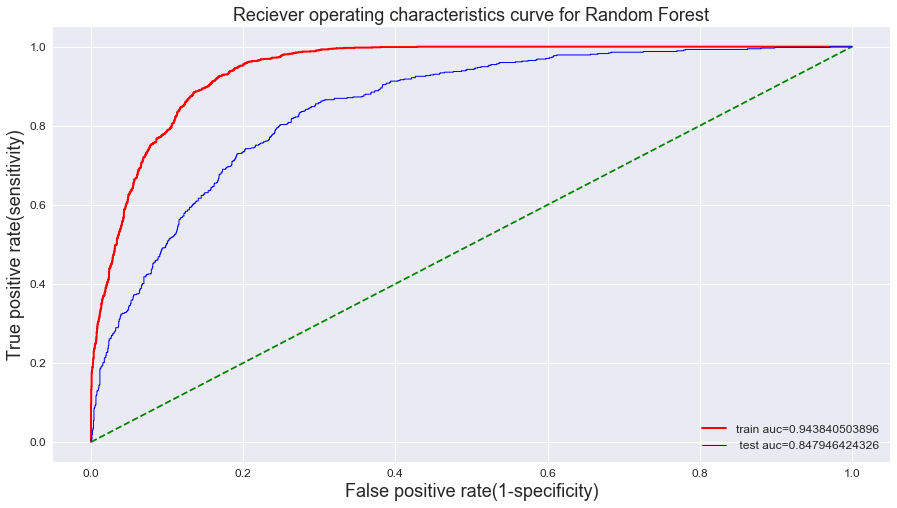

*************************************************************************
Matrix on test data
Confusion Matrix


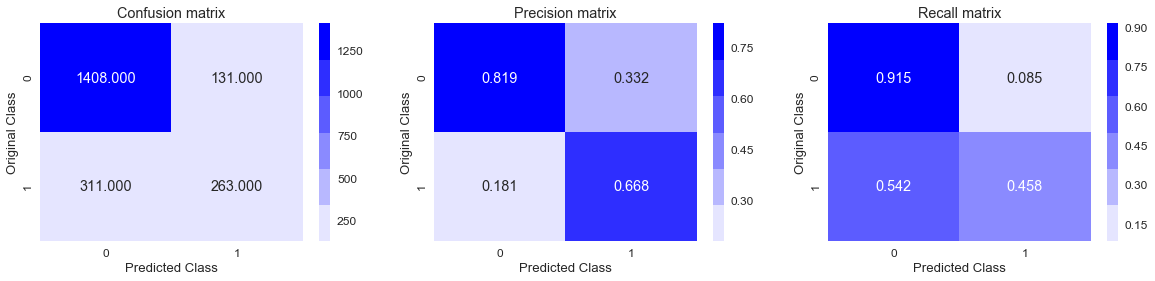

In [81]:
# for Random forest  
best_rf = RandomForestClassifier(max_depth =max_depth,n_estimators = n_estimators,bootstrap = True,\
                                 criterion = 'gini',max_features = 'auto')
best_rf.fit(X_train,Y_train)
rf_train_proba = best_rf.predict_proba(X_train)[:,1] 
rf_test_proba = best_rf.predict_proba(X_test)[:,1] 
rf_train_auc = roc_auc_score(Y_train,rf_train_proba)
rf_test_auc = roc_auc_score(Y_test,rf_test_proba)
rf_test_pred = best_rf.predict(X_test)
#printing all the metrics scores
rf_recall_score = recall_score(Y_test,rf_test_pred)
rf_precision_score = precision_score(Y_test,rf_test_pred)
rf_f1_Score = f1_score(Y_test,rf_test_pred)

print('AUC on test dataset is:',rf_test_auc)
plot_roc(rf_train_proba,rf_test_proba,rf_train_auc,rf_test_auc,'Random Forest')
print('*************************************************************************')
print('Matrix on test data')
plot_confusion_matrix(rf_test_pred)


AUC on test data is 0.625143482011
plotting ROC on Test data


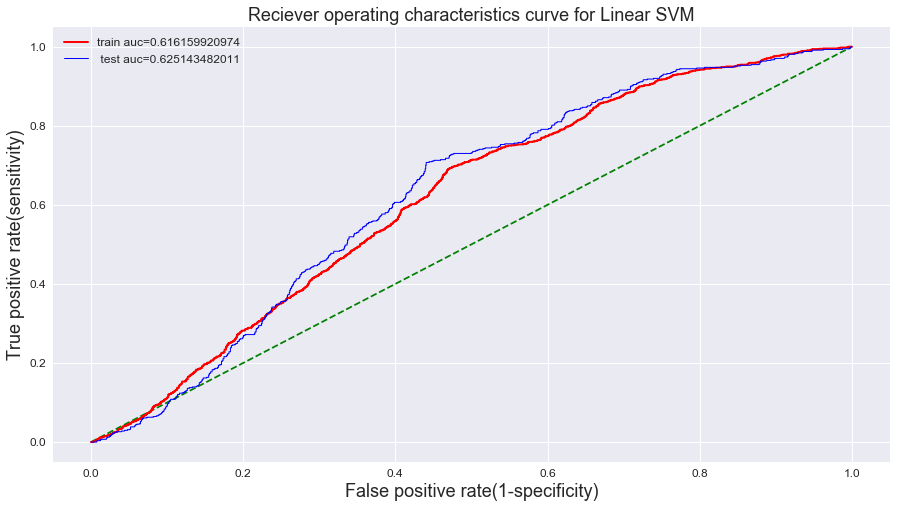

*************************************************************************
Matrix on test data
Confusion Matrix


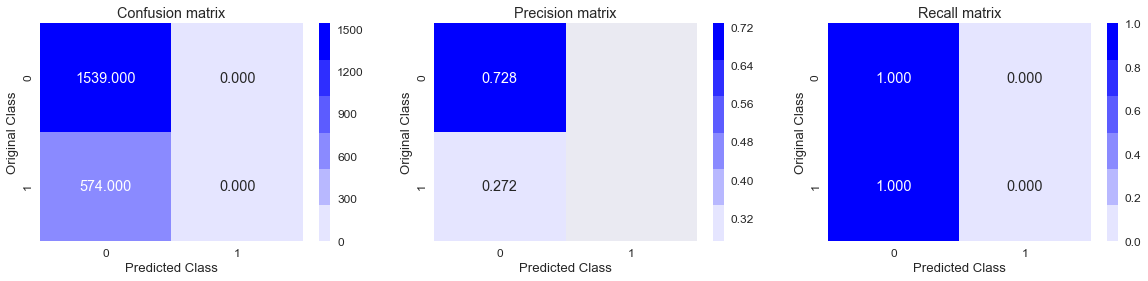

In [82]:
from sklearn.calibration import CalibratedClassifierCV
clf_optimal = SGDClassifier(alpha = best_alpha_svm['alpha'],penalty = 'l2',loss = 'hinge',random_state = 42)
clf_optimal.fit(X_train,Y_train)
clb = CalibratedClassifierCV(clf_optimal,cv = 5,method = 'sigmoid')
clb.fit(X_train,Y_train)
train_proba = clb.predict_proba(X_train)[:,1]
test_proba = clb.predict_proba(X_test)[:,1]
    # = clb.predict(train_set)
pred_test = clb.predict(X_test)
    
train_auc = roc_auc_score(Y_train,train_proba)
test_auc = roc_auc_score(Y_test,test_proba)
    
#printing all the metric scores

svm_recall_score = recall_score(Y_test,pred_test)
svm_precision_score = precision_score(Y_test,pred_test)
svm_f1_Score = f1_score(Y_test,pred_test)
#print('AUC on training data is',train_auc)
print('AUC on test data is',test_auc)
#print('AUC on test dataset is:',rf_test_auc)
plot_roc(train_proba,test_proba,train_auc,test_auc,'Linear SVM')
print('*************************************************************************')
print('Matrix on test data')
plot_confusion_matrix(pred_test)


# Conclusion and observations

In [84]:
from prettytable import PrettyTable 

#tabl
table = PrettyTable()
no = [1,2,3]
models = ['Logistic Regression using L2 regularization','Random Forest','Linear SVM suing l2 regularization']#all vectorizers
recall_scores = [lr_recall_score,rf_recall_score,svm_recall_score]
precision_scores = [lr_precision_score,rf_precision_score,svm_precision_score]
f1_scores = [lr_f1_Score,rf_f1_Score,svm_f1_Score]
AUC = [lr_test_auc,rf_test_auc,test_auc]#their respective auc scores

table.add_column("SNo",no)
table.add_column('models',models)
table.add_column('precision score',precision_scores)
table.add_column('recall_scores',recall_scores)
table.add_column('f1_score',f1_scores)
#table.add_column('Regularization',regularization)
#table.add_column('Hyperparameter(alpha)',alphas)
table.add_column('AUC on test',AUC)

print(table)

+-----+---------------------------------------------+-----------------+----------------+----------------+----------------+
| SNo |                    models                   | precision score | recall_scores  |    f1_score    |  AUC on test   |
+-----+---------------------------------------------+-----------------+----------------+----------------+----------------+
|  1  | Logistic Regression using L2 regularization |  0.638580931264 | 0.501742160279 | 0.561951219512 | 0.839037521536 |
|  2  |                Random Forest                |  0.667512690355 | 0.45818815331  | 0.543388429752 | 0.847946424326 |
|  3  |      Linear SVM suing l2 regularization     |       0.0       |      0.0       |      0.0       | 0.625143482011 |
+-----+---------------------------------------------+-----------------+----------------+----------------+----------------+


- Logistic Regression perfomed best with best recall score ,though AUC score for random forest is better than the Logistic regression

__Tenure and longer contracts__: These variables have positive impacts in reducing churn. In charge with this informations, the selling and customer success departaments could push longer contract to clients. Each month that the client stays increases the chances of the client staying yet another month.

- More comments on Tenure The churn is very high after one month, and we have two main hypotheses for that:

- Our client (the telecom) does not make a good screening process to accecpt or not clients. This is a opportunitty to yet another project, risk modelling for new customers acceptance.
Our onboarding process is too bad (we may take too long to install the service in the customer's house, the product may be hard to use, etc)

__Monthly Charges Cheaper payments__ :have a good effect on churn. We could further investigate it to find out what is the effect in the life-time value when the price is decrease for a certain service plan. We could get new Monthly charges that would optimize life-time value of the client. The second usage of this insight is more direct. If a customer wants to finish his contract with the telecom, offering the customer a discount for a certain time is a good practice. The changes of churn decreases and even when the discount is over, the chances of churn are smaller because of the increase in tenure.

__Phone Service and InternetService__ : has a bad effect on Churn, and PhoneService has a null effect . Our hypotheses are that the customers don't care much about the PhoneService and that our InternetService is bad. The telecom could survey clients about the PhoneService and InternetService to test these hypotheses. If they turn out to be true, maybe reducing the offer of PhoneService to a niche group and adjustments to the InternetService could improve our profits.

__The Model Note__: the model has not achieved the desired results and can not be used by the business as is. Improvements are commented in this document. In this section, we would like to expose what could be done with a good prediction model. One of the main uses of the models would be to automate customer services. For instance, since decreases in Montly charges improve churn, the clients with the highest probabilities of churn could receive automatic discounts or coupons.

# What can be done

Look at their profile, identify characteristics and analyse past interactions with your product and then simply talk to them. Ask for feedback, communicate latest developments that might be from interest or educate them on new product features. Approach customers likely to churn, but make sure that you come up with relevant things that may fit their individual needs. It will create a feeling of being understood and bind them to you and your business.